<a href="https://colab.research.google.com/github/Kimjibeom/Python_Example/blob/main/CNN_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC_%EA%B0%9C%EC%99%80_%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

개(1)와 고양이(0) 이미지 분류하기

데이터 준비하기

Colab을 이용 - Google api를 통해 데이터 불러오기

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-07-05 08:29:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   180MB/s    in 0.4s    

2021-07-05 08:29:48 (180 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



데이터 폴더 나누기

In [2]:
#압축 풀기
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
rootPath = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(rootPath, 'train')
validation_dir = os.path.join(rootPath, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

데이터 확인

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

['cat.539.jpg', 'cat.142.jpg', 'cat.388.jpg', 'cat.452.jpg', 'cat.116.jpg', 'cat.39.jpg', 'cat.236.jpg', 'cat.101.jpg', 'cat.344.jpg', 'cat.573.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


데이터 증식 Data Argumentation

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = '/tmp/cats_and_dogs_filtered'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'validation'),
    target_size=(64, 64),
    subset='validation'
)

Found 1800 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


간단한 CNN 모델을 구성

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))


모델 설정하기

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

모델 학습하기

In [8]:
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    validation_data=validationGen
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
57/57 [==============================] - 38s 119ms/step - loss: 0.6952 - acc: 0.5056 - val_loss: 0.6925 - val_acc: 0.5300
Epoch 2/32
57/57 [==============================] - 7s 115ms/step - loss: 0.6919 - acc: 0.5300 - val_loss: 0.6834 - val_acc: 0.6100
Epoch 3/32
57/57 [==============================] - 6s 113ms/step - loss: 0.6907 - acc: 0.5378 - val_loss: 0.6870 - val_acc: 0.5700
Epoch 4/32
57/57 [==============================] - 6s 114ms/step - loss: 0.6831 - acc: 0.5656 - val_loss: 0.6836 - val_acc: 0.6400
Epoch 5/32
57/57 [==============================] - 7s 115ms/step - loss: 0.6800 - acc: 0.5800 - val_loss: 0.6912 - val_acc: 0.5500
Epoch 6/32
57/57 [==============================] - 6s 114ms/step - loss: 0.6652 - acc: 0.6072 - val_loss: 0.6449 - val_acc: 0.6200
Epoch 7/32
57/57 [==============================] - 6s 113ms/step - loss: 0.6649 - acc: 0.6156 - val_loss: 0.6677 - val_acc: 0.6500
Epoch 8/32
57/57 [==============================] - 6s 113ms/step - loss: 0

학습 결과 그리기

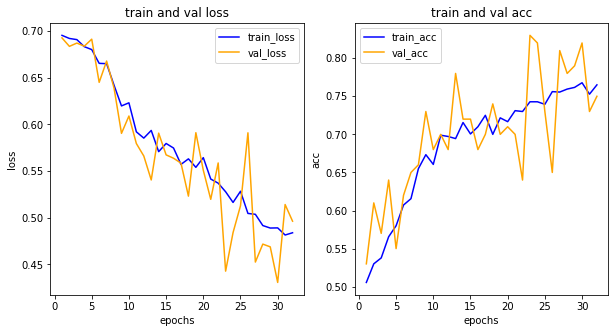

In [9]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델 평가하기

In [10]:
model.evaluate_generator(validationGen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.4852779507637024, 0.7599999904632568]

모델 예측하기

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0.6974916  0.29569077]]
예측: 고양이
정답: 고양이


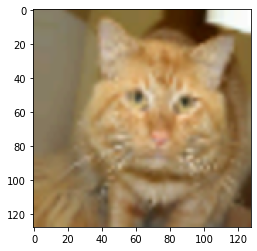

In [32]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = validationGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
result2 = model.predict(arr.reshape(1, 64, 64, 3))

print(result2)
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))